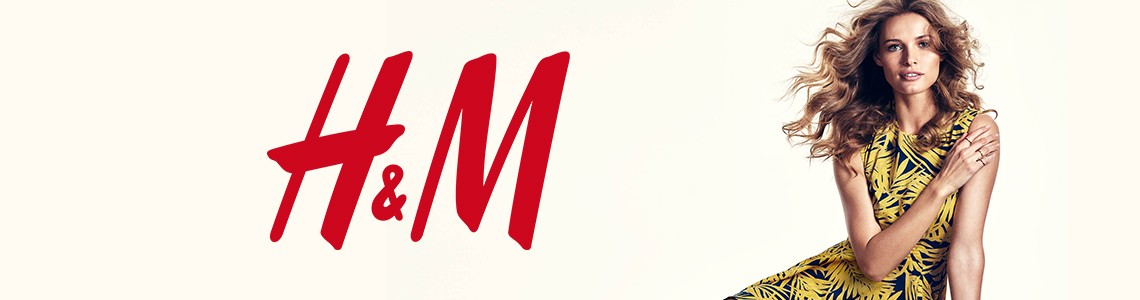

**This kernel is a continuous work, throughout the competition, I'll do data exploration daily and will be updating this kernel.**


**Two cent advice from H&M**
> There are no preconceptions on what information that may be useful (in this Competition)– that is for you to find out. If you want to investigate a categorical data type algorithm, or dive into NLP and image processing deep learning, that is up to you.

You can develop product recommendation using data from 

1. Previous Transactions (`transactions_train.csv`)
2. Customer Metadata (`customers.csv`)
3. Product Metadata (`articles.csv`) 
4. Image Data

Data comes in different forms such as :- 

* Simple data (Product name and customer details with transactions)
* Text data (Product descriptions)
* Image data (Garment images)

Note :- First we'll explore Simple data, then Text data and in the end Image data... 


Following kernels will be helpfull in further exploration.

1. **Winning Solutions of Similar Past Kaggle Competitions** [Link](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/305996)
2. **Deep Learning Research Papers in Product Matching**  [Link](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/discussion/305998)

Special Thanks to [Tensor Girl](https://www.kaggle.com/usharengaraju)  for above suggestions.

In [ ]:
import os
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

### **Articles** 👚

In [ ]:
articles = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv')

In [ ]:
articles.shape

In [ ]:
articles.head(3)

In [ ]:
# Missing Values 

print(f"Total observation in the articles file : {articles.shape[0]} \n")

pd.DataFrame({
    'value': articles.isnull().sum(),
    'percentage' : articles.isnull().sum() * 100 / articles.shape[0]
}).sort_values(by='percentage', ascending=False).head(5)

In [ ]:
colname, unique_value = [], []

for col in articles.select_dtypes(include='object'):
    colname.append(col)
    unique_value.append(articles[col].nunique())
    
pd.DataFrame({
    'colum': colname,
    'unique Count' : unique_value
}).sort_values('unique Count', ascending=False).reset_index(drop=True)

In [ ]:
count_prod_name = pd.DataFrame({
                        'product':articles.prod_name.value_counts().index ,
                        'Count':articles.prod_name.value_counts().values})

count_prod_name = count_prod_name[count_prod_name.Count > 30]

fig = px.bar(count_prod_name, x='product', y='Count', color='Count')
fig.update_layout(
    title={
        'text': "Unique Product and Count Distribution [Only count > 30]",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
count_prod1 = pd.DataFrame({
                        'Product GroupName':articles.product_group_name.value_counts().index ,
                        'value_count':articles.product_group_name.value_counts().values})

fig = px.bar(count_prod1, x='Product GroupName', y='value_count',color='value_count')
fig.add_annotation( 
    text="we can exclude after these", x="Furniture", y=1500, arrowhead=1, showarrow=True
            )
fig.update_layout(
    title={
        'text': "Unique Product Group Name and Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
count_prod1 = pd.DataFrame({
                        'prod':articles.index_name.value_counts().index ,
                        'val':articles.index_name.value_counts().values})
    
fig = px.bar(count_prod1, x='prod', y='val',color='val')
fig.show()

In [ ]:
count_prod1 = pd.DataFrame({
                        'Section Name':articles.section_name.value_counts().index ,
                        'Count':articles.section_name.value_counts().values})
    
fig = px.bar(count_prod1, x='Section Name', y='Count', color='Count')
fig.update_layout(
    title={
        'text': "Section Name and Count",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
count_prod1 = pd.DataFrame({
                        'Colour GroupName':articles.colour_group_name.value_counts().index ,
                        'Count':articles.colour_group_name.value_counts().values})
    
fig = px.bar(count_prod1, x='Colour GroupName', y='Count', color='Count')
fig.update_layout(
    title={
        'text': "Unique Color and Count",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

### **Transactions**

In [ ]:
transactions_train = pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
transactions_train.shape

In [ ]:
transactions_train.head(3)

In [ ]:
# Missing Values 

print(f"Total observation in the transactions_train file : {transactions_train.shape[0]} \n")

pd.DataFrame({
    'value': transactions_train.isnull().sum(),
    'percentage' : transactions_train.isnull().sum() * 100 / transactions_train.shape[0]
}).sort_values(by='percentage', ascending=False).head(5)

In [ ]:
transactions_train.t_dat = transactions_train.t_dat.astype('datetime64')

transactions_train['month'] = transactions_train['t_dat'].dt.month
transactions_train['day_name'] = transactions_train['t_dat'].dt.day_name()

In [ ]:
count_prod1 = pd.DataFrame({
                        'Day':transactions_train.day_name.value_counts().index ,
                        'Count':transactions_train.day_name.value_counts().values})
    
fig = px.bar(count_prod1, x='Day', y='Count', color='Count')
fig.update_layout(
    title={
        'text': "Day and Count",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
count_prod1 = pd.DataFrame({
                        'Month':transactions_train.month.value_counts().index ,
                        'Count':transactions_train.month.value_counts().values})
    
fig = px.bar(count_prod1, x='Month', y='Count', color='Count')

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2,3, 4,5, 6,7,8, 9,10, 11,12],
        ticktext = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                    'August', 'September', 'October', 'November', 'December', 'Months']
    )
)
fig.show()

### **Customers**

In [ ]:
customers = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/customers.csv')
customers.shape

In [ ]:
customers.head(3)

In [ ]:
# Missing Values 

print(f"Total observation in the csutomer file : {customers.shape[0]} \n")

pd.DataFrame({
    'value': customers.isnull().sum(),
    'percentage' : customers.isnull().sum() * 100 / customers.shape[0]
}).sort_values(by='percentage', ascending=False)

In [ ]:
count_prod = pd.DataFrame({
                        'Age':customers.age.value_counts().index ,
                        'Count':customers.age.value_counts().values})
    
fig = px.bar(count_prod, x='Age', y='Count', color='Count')

fig.update_layout(
    title={
        'text': "Age Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**Text & Images**

coming soon....

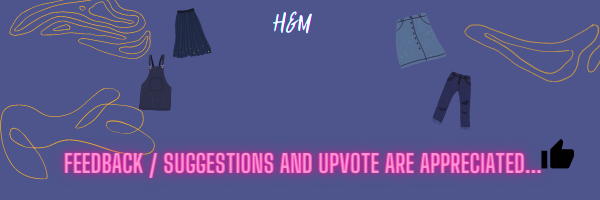